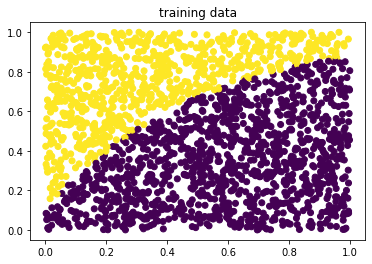

In [31]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import math

pkl_file = open('classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)

n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('training data')
plt.show()

### 2-(c),(d) Classifier 1: Logistic Loss Function

[[-4.32995279]
 [ 6.12750557]
 [-1.7312845 ]]


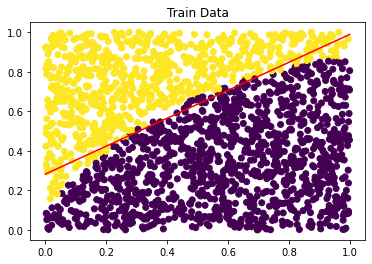

Errors: 74
Error rate:  0.037


In [16]:
n = x_train.shape[0]
X = np.hstack([x_train, np.ones((n,1))])
y = np.array(y_train, dtype = float)

it = 100
la = 1
tau = 0.001

w = np.zeros((3,1))

for i in range(it):
    grad = 2 * la * w
    for j in range(n):
        x_j = X[[j],:].T
        y_j = y[j]
        
        term_1 = 1 / (1 + np.exp(-y_j * x_j.T @ w))
        term_2 = np.exp(-y_j * x_j.T @ w)
        term_3 = -y_j * x_j

        grad += (term_1 * term_2 * term_3).reshape(3,1)
        
        
    w = w - tau * grad
    
    #if i % 10 == 0:
    #    print(np.average(np.sign(X@w) == y))
        

w_opt = w
y_hat = np.sign(X@w_opt)
print(w_opt)

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y))]

plt.scatter(X[:,0],X[:,1], c= y_train[:,0]) 
x = np.linspace(0,1,100)
y = -(w_opt[0][0]/w_opt[1][0]) * x - (w_opt[2][0] / w_opt[1][0])
plt.plot(x, y, '-r', label='decision boundary')
plt.title('Train Data')
plt.show()

print('Errors: '+ str(sum(error_vec)))
print('Error rate: ', sum(error_vec) / len(x_train))

### 2-(e) Classifier 2: Squared Loss Function

[[-1.4024338 ]
 [ 2.30646659]
 [-0.69000093]]


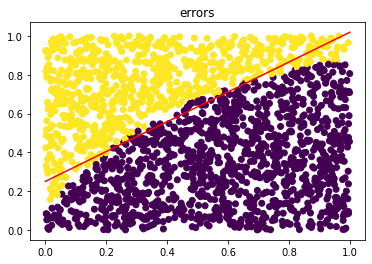

Errors: 90
Error rate:  0.045


In [54]:
pkl_file = open('classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)

n_train = np.size(y_train)

n = x_train.shape[0]
X = np.hstack([x_train, np.ones((n,1))])
#X = x_train
y = np.array(y_train, dtype = float)

it = 100
la = 1
tau = 0.001
w = np.zeros((3,1))


w_ls = np.linalg.inv(X.T @ X)@ X.T @ y
print(w_ls)
y_hat_ls = np.sign(X@w_ls)

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_ls, y))]

plt.scatter(X[:,0], X[:,1], c = y_train[:,0]) # green = misclassification
x = np.linspace(0,1,100)
y = -(w_opt[0][0]/w_opt[1][0]) * x - w_opt[2][0] / w_opt[1][0]
plt.plot(x, y, '-r', label='decision boundary')
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))
print('Error rate: ', sum(error_vec) / len(x_train))

### 2-(f)

In [58]:
a = np.array(1000 * [[10,0]])
X_add = np.vstack((x_train,a))
X_add

array([[ 0.36969724,  0.64696387],
       [ 0.19898362,  0.52560645],
       [ 0.72201158,  0.52756091],
       ...,
       [10.        ,  0.        ],
       [10.        ,  0.        ],
       [10.        ,  0.        ]])

In [59]:
b = np.array(1000 * [[-1]])
y_add = np.vstack([y_train, b])
y_add

array([[ 1],
       [ 1],
       [-1],
       ...,
       [-1],
       [-1],
       [-1]])

### Logistic Loss

[[-4.92708661]
 [ 6.41112503]
 [-1.6048185 ]]


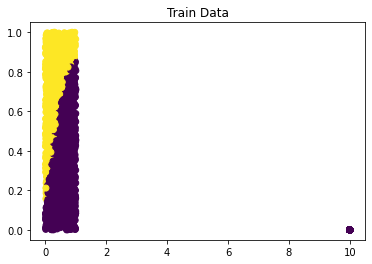

Errors: 79
Error rate:  0.0395


In [51]:
w_opt = w
y_hat = np.sign(X_add@w_opt)
print(w_opt)

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y))]

plt.scatter(X_add[:,0],X_add[:,1], c=y_add[:,0])
plt.title('Train Data')
plt.show()

print('Errors: '+ str(sum(error_vec)))
print('Error rate: ', sum(error_vec) / len(x_train))

[[-4.92708661]
 [ 6.41112503]
 [-1.6048185 ]]


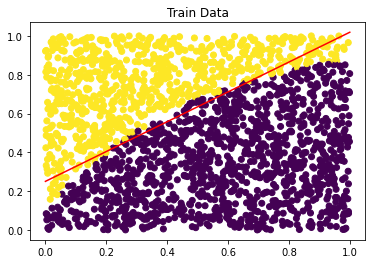

Errors: 79
Error rate:  0.026333333333333334


In [71]:
n = X_add.shape[0]
X = np.hstack([X_add, np.ones((n,1))])
y = np.array(y_add, dtype = float)

it = 100
la = 1
tau = 0.001

w = np.zeros((3,1))

for i in range(it):
    grad = 2 * la * w
    for j in range(n):
        x_j = X[[j],:].T
        y_j = y[j]
        
        term_1 = 1 / (1 + np.exp(-y_j * x_j.T @ w))
        term_2 = np.exp(-y_j * x_j.T @ w)
        term_3 = -y_j * x_j

        grad += (term_1 * term_2 * term_3).reshape(3,1)
        
        
    w = w - tau * grad
    
        

w_opt = w
print(w_opt)
y_hat = np.sign(X@w_opt)


error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y))]

plt.scatter(x_train[:,0],x_train[:,1], c = y_train[:,0]) 
x = np.linspace(0,1,100)
y = -(w_opt[0][0]/w_opt[1][0]) * x - (w_opt[2][0] / w_opt[1][0])
plt.plot(x, y, '-r', label='decision boundary')
plt.title('Train Data')
plt.show()

print('Errors: '+ str(sum(error_vec)))
print('Error rate: ', sum(error_vec) / n)

### Squared-Loss

[[ 0.03458857]
 [ 2.27733328]
 [-1.37097124]]


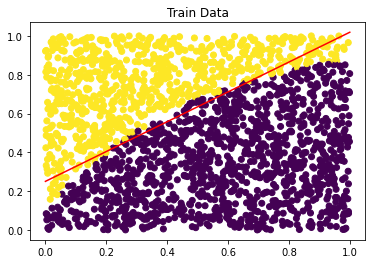

Errors: 358
Error rate:  0.11933333333333333


In [82]:
wopt = np.linalg.inv(X.T @ X) @ X.T @ y_add
print(wopt)
y_hat = np.sign(X @ wopt)

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_add))]
plt.scatter(x_train[:,0],x_train[:,1], c = y_train[:,0]) 
x = np.linspace(0,1,100)
y = -(w_opt[0][0]/w_opt[1][0]) * x - (w_opt[2][0] / w_opt[1][0])
plt.plot(x, y, '-r', label='decision boundary')
plt.title('Train Data')
plt.show()

print('Errors: '+ str(sum(error_vec)))
print('Error rate: ', sum(error_vec) / n)